<a href="https://colab.research.google.com/github/mickey2798/CarClassifierDeTectTechnologies/blob/master/Piyush_Kumar_Sahoo_Car_Classifier_DeTect_Technologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I have attempted all the 3 ques and have written answers In this particular Google Colab Notebook.

##Kindly, go through the notebook till the END.

# **1. Model fine tuning while training on a custom dataset **

### Solution - 

Just to make you aware before explaining the code and my approach, I am basically classifing two cars( Namely - Hyundai i10 & Hyundai i20) using Pretrained Model- VGG 16 [Transfer Learning].

### My approach - 


Loading all the data from google drive as a zip folder, then carefully unzipping it and making two different folders[namely train and test].
So, the exact numbers taken for each class in training and testing are 

Training -> Hyundai i10 - 311  &   Hyundai i20 - 330

Testing  -> Hyundai i10 - 24   &   Hyundai i20 - 27



Here, to classify between the cars I have used VGG16 Pretrained model.
Additionally, I have removed the top layers and added mine because I have only 2 unique classes(i10 & i20).

I must say, that I have tweak the hyperparameters and fine tuned, so that I can achieve 83.4% accuracy which was earlier 70%.

The hyperparameters which I have tweaked are - 

1. optimizer = optimizers.SGD(lr=0.0001, momentum=0.9) before it was Adam.
2. Dense(units=4096,activation="relu") before it was not too dense(512).
3. activation="softmax" before it was "sigmoid".
4. Used ModelCheckPoint so I wont loss the weight of best accuracy.
5. I have also drawn graph that represent "Loss vs Validation_Loss" & "Accuracy vs Validation_Accuracy".



##For More Details please "Have a Look at my Code."





In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=1XUwCbYsuUjrwuS9VyNy04cRpOATngQdy'

In [ ]:
fluff, id = link.split('=')
print (id)

1XUwCbYsuUjrwuS9VyNy04cRpOATngQdy


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training-testing.zip') 

In [ ]:
import os
os.chdir('/content')

In [ ]:
!ls

adc.json  sample_data  training-testing.zip


In [ ]:
!unzip training-testing.zip

Archive:  training-testing.zip
   creating: training-testing/
   creating: training-testing/test/
   creating: training-testing/test/hyundai_i10/
  inflating: training-testing/test/hyundai_i10/66.jpg  
  inflating: training-testing/test/hyundai_i10/68.jpg  
  inflating: training-testing/test/hyundai_i10/72.jpg  
  inflating: training-testing/test/hyundai_i10/252.jpg  
  inflating: training-testing/test/hyundai_i10/253.jpg  
  inflating: training-testing/test/hyundai_i10/254.jpg  
  inflating: training-testing/test/hyundai_i10/255.png  
  inflating: training-testing/test/hyundai_i10/256.png  
  inflating: training-testing/test/hyundai_i10/257.jpg  
  inflating: training-testing/test/hyundai_i10/258.jpg  
  inflating: training-testing/test/hyundai_i10/259.jpg  
  inflating: training-testing/test/hyundai_i10/260.jpg  
  inflating: training-testing/test/hyundai_i10/261.jpg  
  inflating: training-testing/test/hyundai_i10/262.jpg  
  inflating: training-testing/test/hyundai_i10/001.jpg  
  

In [ ]:
!ls

adc.json  sample_data  training-testing  training-testing.zip


In [ ]:
os.chdir('training-testing')

In [ ]:
!ls

test  train


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras

Using TensorFlow backend.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True)
#val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen = image_datagen.flow_from_directory('train/', target_size=(256,256),batch_size=32,class_mode='categorical')
val_datagen = image_datagen.flow_from_directory('test/',target_size=(256,256),batch_size=16,class_mode='categorical')

Found 640 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [ ]:
import keras
from keras.applications import vgg16
from keras.models import Model
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(256,256,3))
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

# vgg_model.trainable = True

# set_trainable = False
# for layer in vgg_model.layers:
#     if layer.name in ['block5_conv1', 'block4_conv1']:
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
for layer in vgg_model.layers[:19]:
    print(layer.name)
    layer.trainable = False

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
model = Sequential()
model.add(vgg_model)
model.add(Dense(units=4096,activation="relu", input_dim=(256,256,3)))
model.add(Dense(units=4096,activation="relu", input_dim=(256,256,3)))
model.add(Dense(units=2, activation="softmax"))


model.compile(loss='categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 32768)             14714688  
_________________________________________________________________
dense_15 (Dense)             (None, 4096)              134221824 
_________________________________________________________________
dense_16 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 8194      
Total params: 165,726,018
Trainable params: 151,011,330
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# results = model.fit_generator(train_datagen,epochs=100,
#                               steps_per_epoch=18,
#                               validation_data=val_datagen,
#                              validation_steps=10)


from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=40, verbose=1, mode='auto')
results = model.fit_generator(train_datagen, steps_per_epoch=18, epochs=100, validation_data= val_datagen, validation_steps=10, callbacks=[checkpoint])
model.save_weights("vgg16_1.h5")

Epoch 1/100
18/18 [==============================] - 18s 1s/step - loss: 0.7073 - accuracy: 0.5243 - val_loss: 0.6724 - val_accuracy: 0.5299

Epoch 00001: val_accuracy improved from -inf to 0.52985, saving model to vgg16_1.h5
Epoch 2/100
18/18 [==============================] - 17s 941ms/step - loss: 0.6883 - accuracy: 0.5243 - val_loss: 0.6128 - val_accuracy: 0.5785

Epoch 00002: val_accuracy improved from 0.52985 to 0.57851, saving model to vgg16_1.h5
Epoch 3/100
18/18 [==============================] - 16s 896ms/step - loss: 0.6837 - accuracy: 0.5712 - val_loss: 0.6769 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.57851
Epoch 4/100
18/18 [==============================] - 16s 894ms/step - loss: 0.6727 - accuracy: 0.5660 - val_loss: 0.6758 - val_accuracy: 0.5950

Epoch 00004: val_accuracy improved from 0.57851 to 0.59504, saving model to vgg16_1.h5
Epoch 5/100
18/18 [==============================] - 15s 816ms/step - loss: 0.6702 - accuracy: 0.5833 - val_lo

In [ ]:
import numpy as np
x = np.arange(0,100)
y = results.history['loss']
y1 = results.history['accuracy']
y2 = results.history['val_accuracy']
y3 = results.history['val_loss']

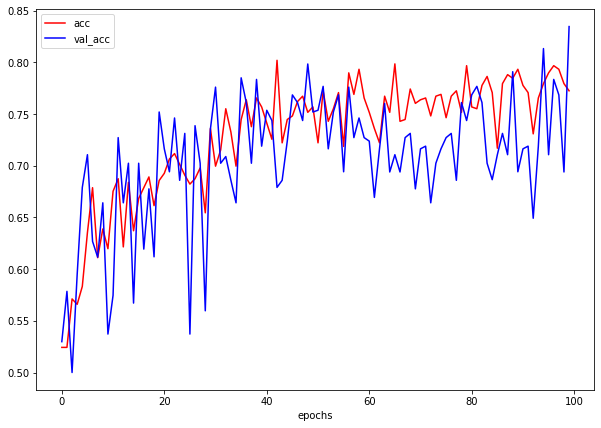

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,y1,c='r',label='acc')
plt.plot(x,y2,c='b',label='val_acc')
plt.xlabel('epochs')
plt.legend()

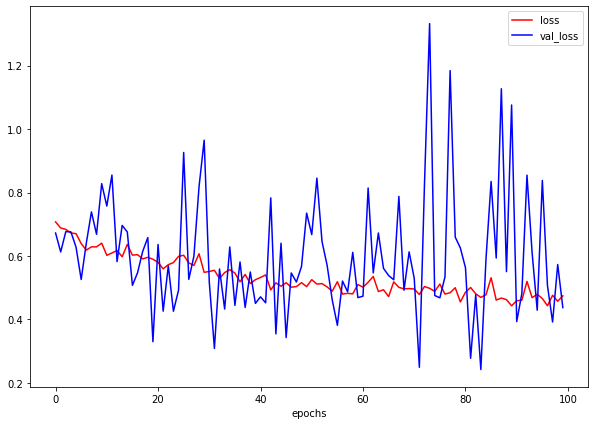

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,y,c='r',label='loss')
plt.plot(x,y3,c='b',label='val_loss')
plt.xlabel('epochs')
plt.legend()

In [ ]:
classes = []
for key in train_datagen.class_indices:
    classes.append(key)

In [ ]:
train_datagen.class_indices

{'hyundai_i10': 0, 'hyundai_i20': 1}

In [ ]:
from keras.preprocessing import image

In [ ]:
#file = 'hyundai_cars/test/hyundai_i10_grand_exterior/72.jpg'
#file = 'test/hyundai_i10_grand_nios/89.jpg'
file = "/content/training-testing/test/hyundai_i10/002.jpg"
#file = 'hyundai_cars/test/hyundai_i20_elite/97.jpg'

In [ ]:
img = image.load_img(file, target_size=(256,256))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

pred = model.predict_classes(img)

classes[pred[0]]

'hyundai_i10'

#2. Handling imbalanced datasets during neural network training.

###a. A classification dataset has 8:2 proportion for two classes, Class A and Class B

###b.A detection dataset has 9:1 proportion for two classes, Class A and Class B. Also, objects of Class A are on an average thrice as big in the image as objects of Class B 


###a.  There are 5 different ways to deal with Imbalanced DataSet.

    1. Change the performance metric
    2. Change the algorithm
    3. Oversample minority class
    4. Undersample majority class
    5. Generate synthetic samples

One of the way is to Generate Synthetic samples, Here we can use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

Sample Code.

    from imblearn.over_sampling import SMOTE

    # Separate input features and target
    y = df.Class
    X = df.drop('Class', axis=1)

    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

    sm = SMOTE(random_state=27, ratio=1.0)
    X_train, y_train = sm.fit_sample(X_train, y_train)



## 3. How to Visualize which areas CNN is focusing on during inference
Broadly summarize different techniques available. Describe at least one technique in detail


Let say if the visualization indicates that model activation is not correct, noisy or not precise, how can you
change the network to achieve a better accuracy. Describe your approach on the lines of manipulating the
network layers

Hint/Question:
What happens when number of convolution filters are added in depth, width and for operating on higher
resolution

##Solution - 


We have observed that at first we use smaller number of convolution layers(Like say 16, 32, 64  so on and so forth) and  if the visualization indicates that model activation is not correct, noisy or not precise we gradually  increses the number.

Explaining, in a very layman terms.

(Intuitively)

Suppose, You lost your keys at your home and you are unable to find. The first thing what we as a human do, Is to find the keys on a very upper layers or You can on a creamy layer(like on the bed, on the key holder, on dining table etc.)
After that if we even didnt find that particular keys then what we do, we search like going depth of each and every particular object(let say, under the table/bed, inside the drawer, inside wardrobe etc.)

Just compare the example to that of Convolution layers and the numbers signifies how depth we want to go.